In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import seaborn as sns
import scipy.cluster.hierarchy as sch
import sklearn.utils

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from yellowbrick.cluster import KElbowVisualizer

%matplotlib inline
sns.set_style('whitegrid')

In [3]:
#load the data
customers_data = pd.read_csv(r"C:\Users\nskol\Downloads\data_ML\clustering\Wholesale customers data.csv")
print(customers_data.shape)
customers_data.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
#check for null values
customers_data.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
#check for duplicates
customers_data.duplicated().sum()

np.int64(0)

In [11]:
#check the type
customers_data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [13]:
#check the distributions
customers_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


C:\Users\nskol\AppData\Local\Temp\ipykernel_18788\2819669261.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


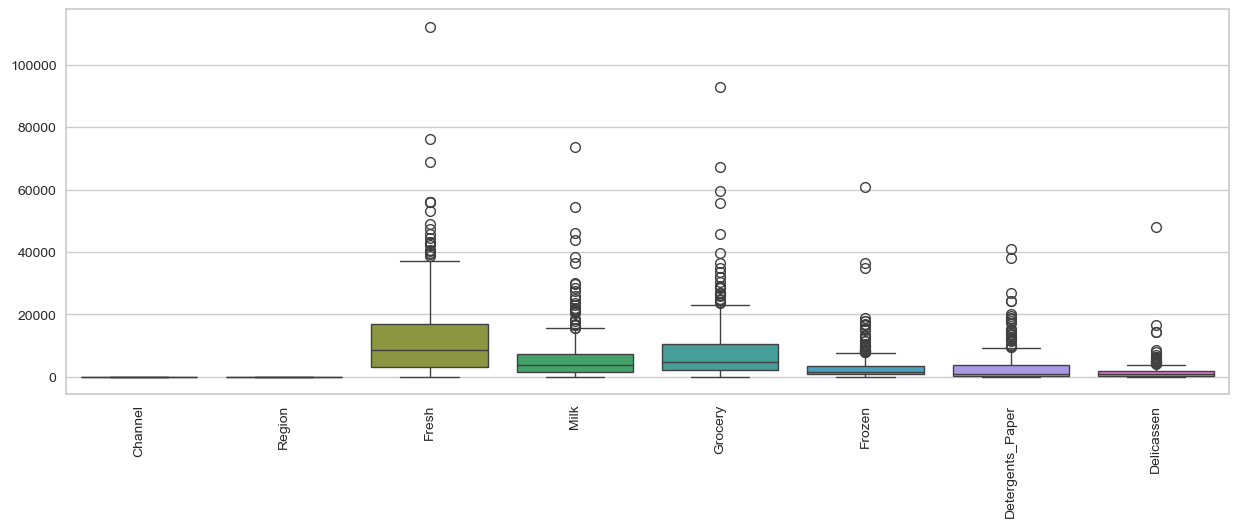

In [15]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data= customers_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [8]:
# with the boxplot we confirmed the presence of some outliers and because we will use kmeans, we need scaling

In [17]:
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(customers_data)

C:\Users\nskol\AppData\Local\Temp\ipykernel_18788\3352658585.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


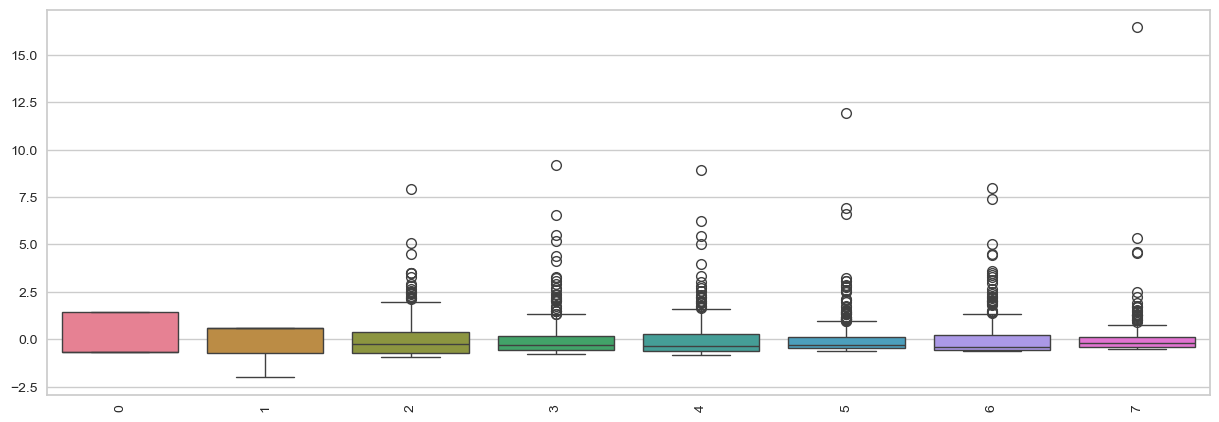

In [19]:
plt.figure(figsize=(15,5))
ax = sns.boxplot(data= X_scaled)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [11]:
#EDA

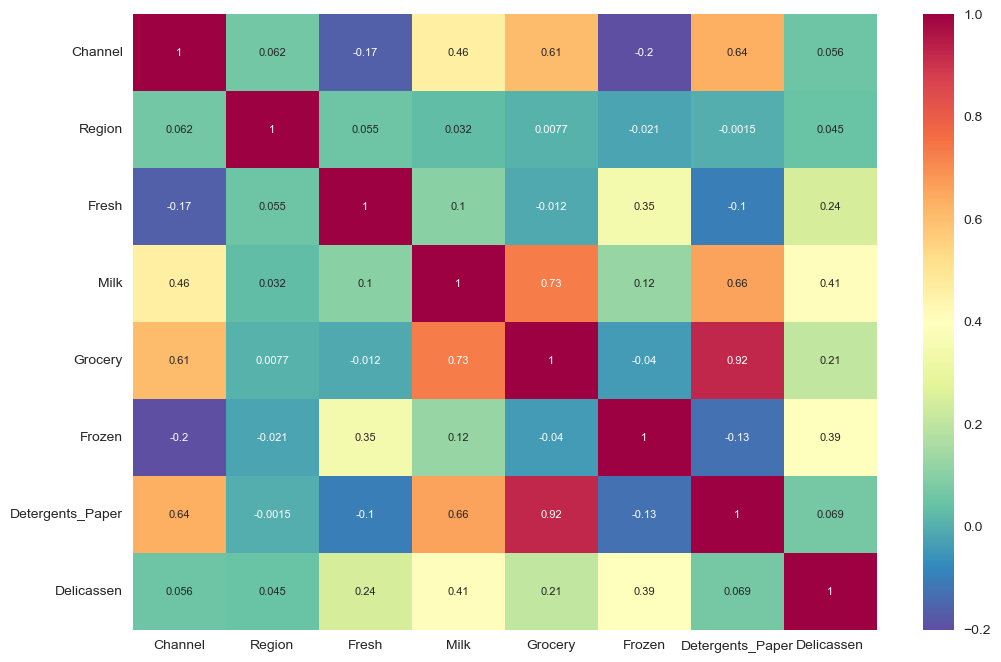

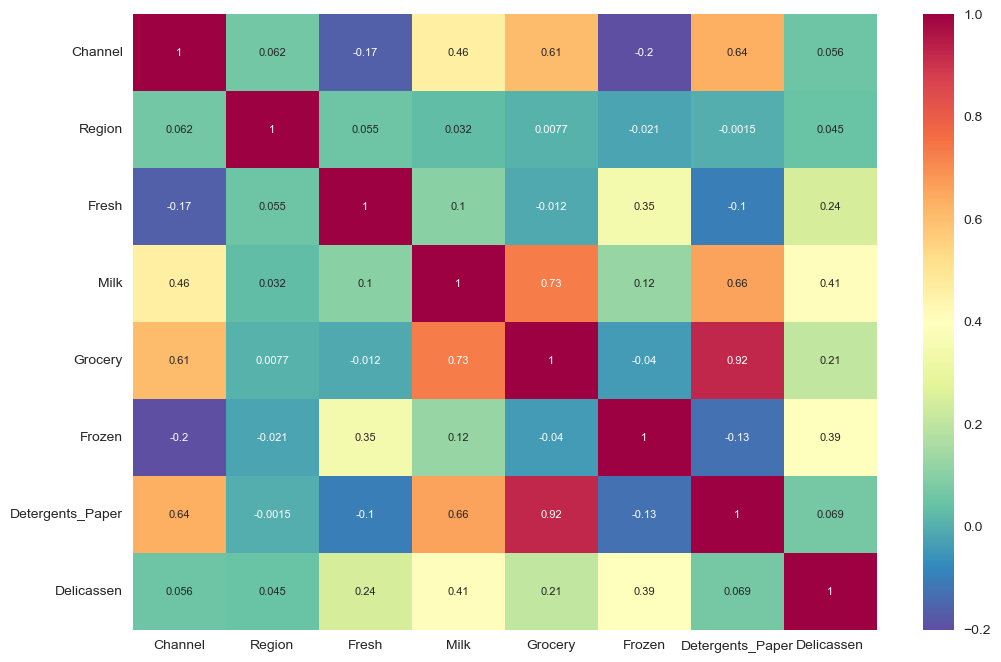

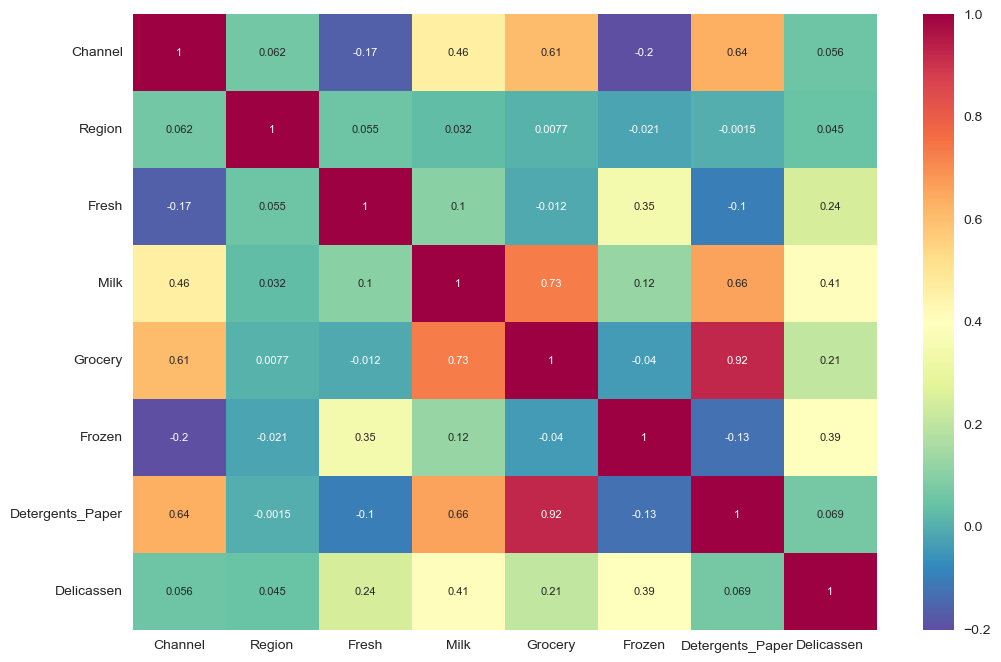

In [29]:
#plot a correlation matrix to underastand the relationships among the numerical variables 
corr_matrix = customers_data.corr()

f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            annot_kws={'size': 8}, 
            cmap="Spectral_r");
plt.show()


In [13]:
#from the corr matrix we conclude that there is a positive correlation between grocery and milk.This indicates that customers
#who buy more groceries tend to buy more milk

<Figure size 3000x1500 with 0 Axes>

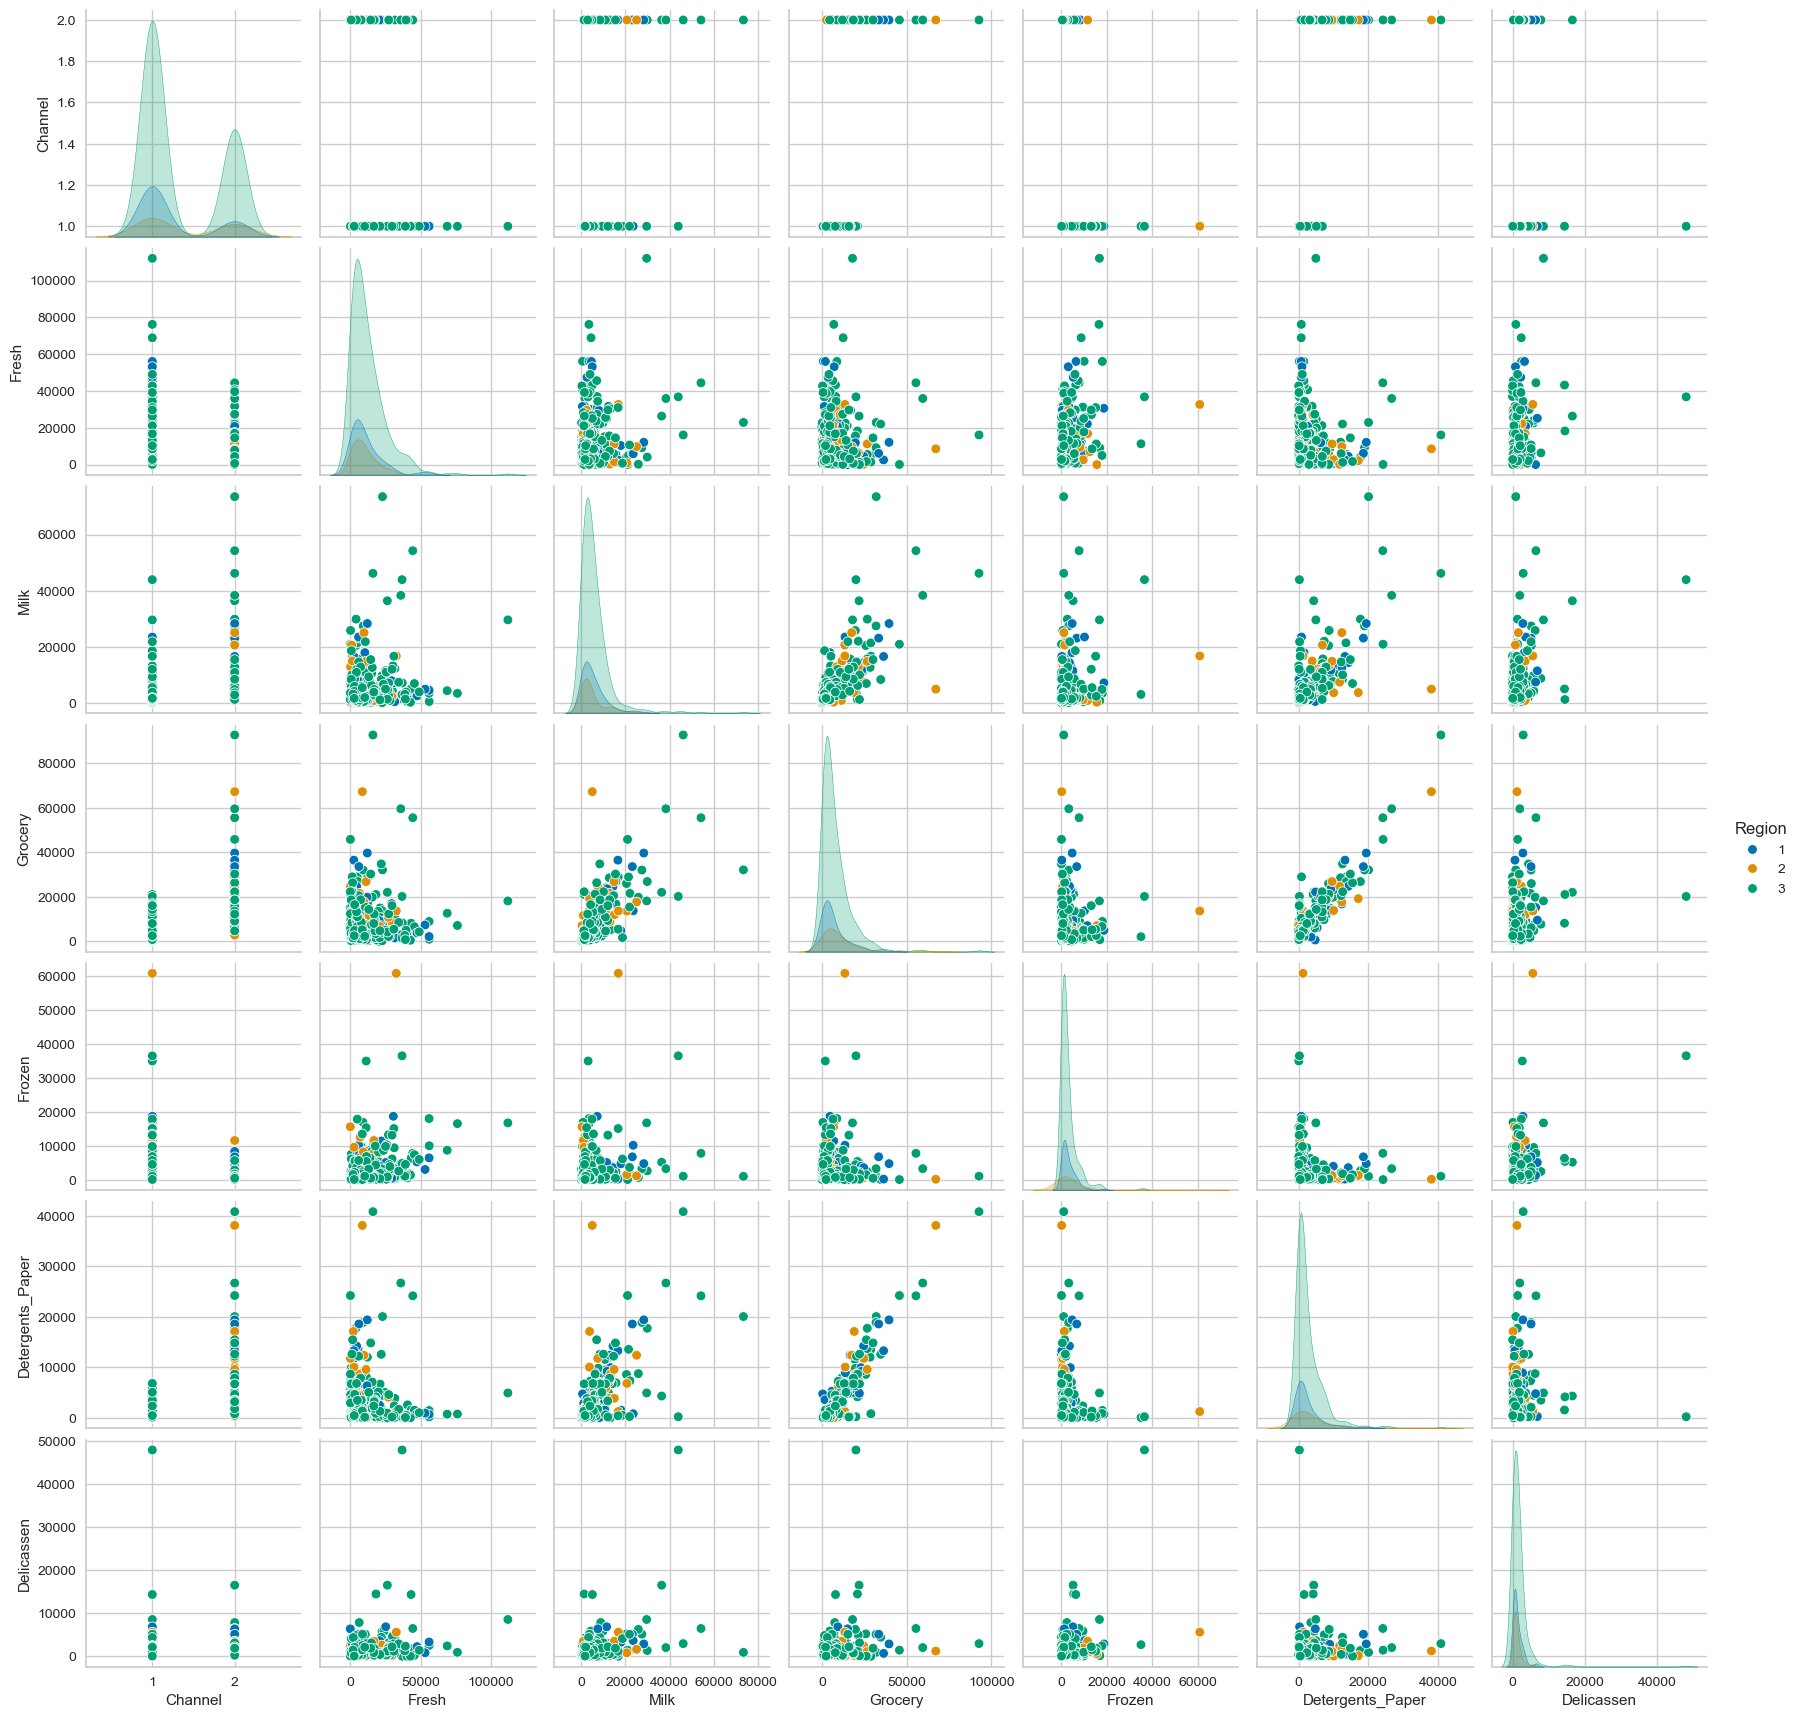

In [31]:
#use a pairplot to see all the variables against each other
plt.figure(figsize=(30, 15))
sns.pairplot(data=customers_data, hue='Region', palette='colorblind')
plt.show();

In [35]:
customers_data["Channel"].unique()

array([2, 1])

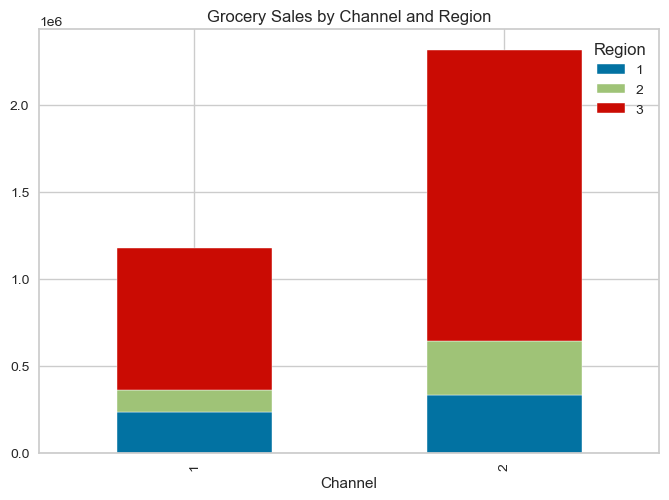

In [59]:
channels = customers_data.pivot_table(index='Channel',columns='Region', values='Grocery', aggfunc='sum')
channels.plot(kind='bar', stacked=True)

# Add a title
plt.title('Grocery Sales by Channel and Region')

plt.show()

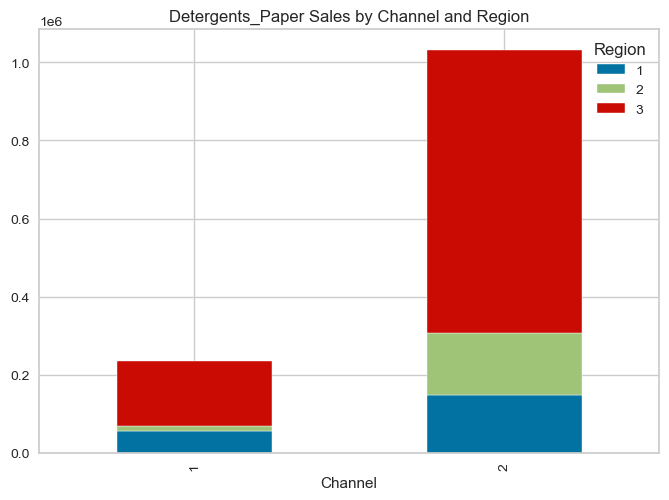

In [61]:
channels = customers_data.pivot_table(index='Channel',columns='Region', values='Detergents_Paper', aggfunc='sum')
channels.plot(kind='bar', stacked=True)

# Add a title
plt.title('Detergents_Paper Sales by Channel and Region')

plt.show()

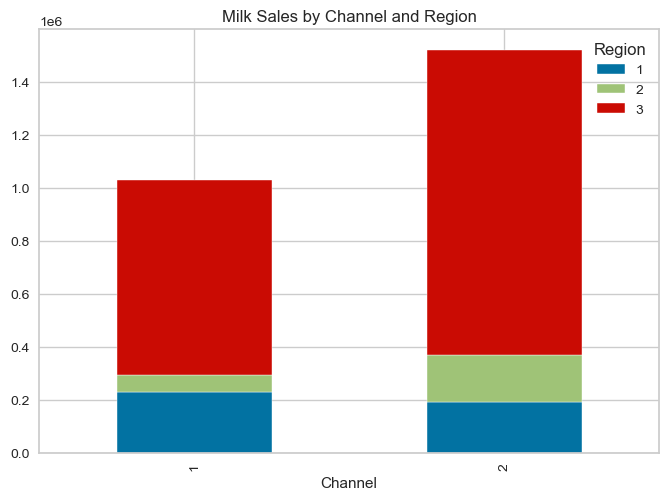

In [63]:
channels = customers_data.pivot_table(index='Channel',columns='Region', values='Milk', aggfunc='sum')
channels.plot(kind='bar', stacked=True)

# Add a title
plt.title('Milk Sales by Channel and Region')

plt.show()

In [65]:
#KMeans
km = KMeans(n_clusters = 4)
km.fit(X_scaled) 

cluster_assignment = km.labels_
cluster_assignment

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 3, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 3, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 0, 0, 1, 3, 1, 1, 0, 3,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 3, 3, 0,
       0, 0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 3, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,

In [67]:
customers_data["KMCluster"] = cluster_assignment
customers_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,1
5,2,3,9413,8259,5126,666,1795,1451,1
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,1
8,1,3,5963,3648,6192,425,1716,750,0
9,2,3,6006,11093,18881,1159,7425,2098,1


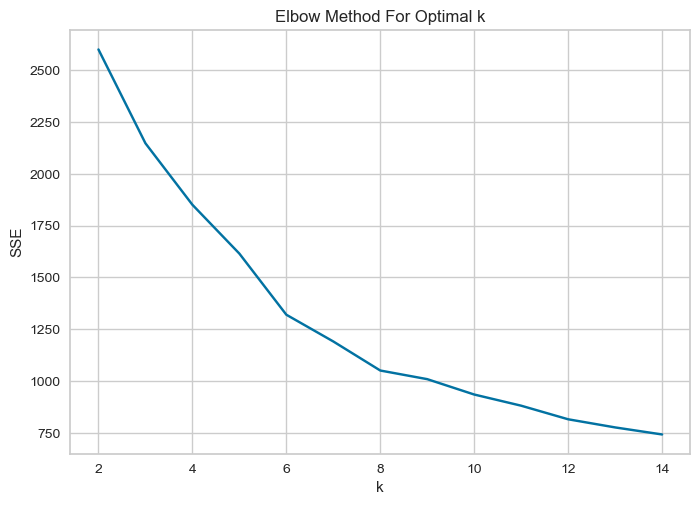

In [73]:
# Elbow method
#creating an empty list for sum of squared distances
Sum_of_squared_distances = [] 

# Values for K (centroids) 
K = range(2, 15)

for k in K:
    km = KMeans(n_clusters =k)
    km = km.fit(X_scaled)
    
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()

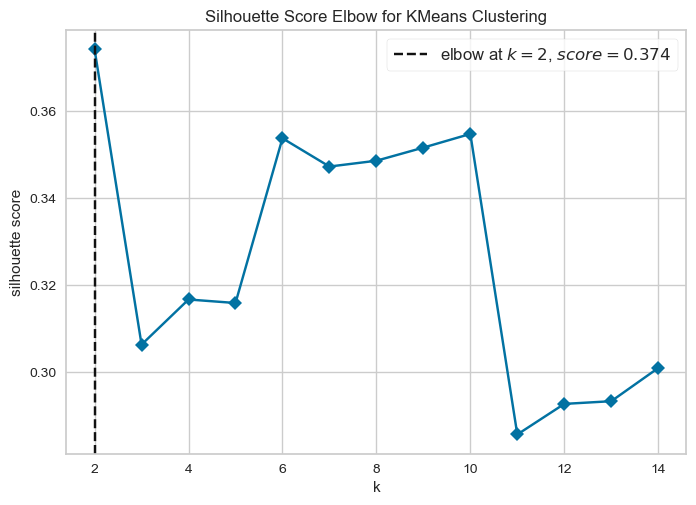

In [71]:
model = KMeans(random_state=123) 

visualizer = KElbowVisualizer(model, k=(2, 15), metric='silhouette', timings=False)
visualizer.fit(X_scaled)    
visualizer.poof()
plt.show();

In [75]:
#optimal k is 6 so:
opt_k = 6
kmodel = KMeans(n_clusters=opt_k)
kmodel.fit(X_scaled)
cluster_assignment = kmodel.labels_
cluster_assignment

array([5, 5, 5, 3, 5, 5, 5, 5, 3, 5, 5, 5, 5, 5, 5, 3, 5, 3, 5, 3, 5, 3,
       1, 5, 5, 5, 3, 3, 5, 1, 3, 3, 3, 1, 3, 5, 1, 5, 5, 1, 1, 3, 5, 5,
       5, 5, 5, 2, 5, 5, 3, 3, 1, 5, 3, 3, 2, 5, 3, 3, 5, 2, 5, 5, 3, 2,
       3, 5, 3, 3, 1, 1, 3, 5, 5, 3, 3, 5, 3, 3, 3, 5, 5, 3, 5, 2, 2, 1,
       3, 3, 3, 3, 2, 1, 5, 3, 5, 3, 3, 3, 5, 5, 5, 1, 3, 3, 5, 5, 5, 5,
       3, 5, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 1, 1, 3, 5, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 5, 5, 3, 5, 5, 5, 3, 3, 5, 5, 5, 5, 3, 3, 3, 5, 5, 3, 5, 3, 5,
       1, 3, 3, 3, 3, 1, 3, 4, 3, 3, 3, 3, 5, 5, 3, 3, 3, 5, 3, 3, 1, 5,
       0, 0, 5, 5, 0, 0, 0, 5, 0, 0, 0, 5, 0, 2, 0, 0, 5, 0, 5, 0, 5, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       5, 0, 5, 0, 5, 0, 0, 0, 0, 1, 3, 3, 1, 1, 3, 5, 3, 5, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 5, 0, 5, 0, 5, 5, 0, 5,

In [77]:
customers_data["KMCluster"] = cluster_assignment
customers_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster
0,2,3,12669,9656,7561,214,2674,1338,5
1,2,3,7057,9810,9568,1762,3293,1776,5
2,2,3,6353,8808,7684,2405,3516,7844,5
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,5
5,2,3,9413,8259,5126,666,1795,1451,5
6,2,3,12126,3199,6975,480,3140,545,5
7,2,3,7579,4956,9426,1669,3321,2566,5
8,1,3,5963,3648,6192,425,1716,750,3
9,2,3,6006,11093,18881,1159,7425,2098,5


In [20]:
#get the centroids
kmodel.cluster_centers_

array([[-6.90297086e-01,  1.86604160e-01,  2.79744286e+00,
         2.53321722e-01, -6.50947105e-02,  2.73711548e+00,
        -3.65528618e-01,  7.31790248e-01],
       [-6.90297086e-01,  5.90668285e-01, -4.44637991e-02,
        -3.74669449e-01, -4.61582985e-01, -4.77455964e-02,
        -4.44883220e-01, -1.32554713e-01],
       [-5.70131428e-01, -1.58855396e+00, -4.09082725e-02,
        -3.52778990e-01, -4.00997545e-01,  3.74583347e-02,
        -4.23874270e-01, -1.48647261e-01],
       [ 1.44865163e+00,  1.73241409e-01, -2.94992139e-01,
         4.46925210e-01,  6.58415940e-01, -3.51075708e-01,
         6.73924931e-01,  4.82058253e-02],
       [ 1.44865163e+00, -5.58343155e-02,  3.13830315e-01,
         3.92190593e+00,  4.27561037e+00, -3.57419457e-03,
         4.61816580e+00,  5.03365339e-01],
       [-6.90297086e-01,  5.90668285e-01,  1.96681731e+00,
         5.17550306e+00,  1.28721685e+00,  6.90059988e+00,
        -5.54861977e-01,  1.64784475e+01]])

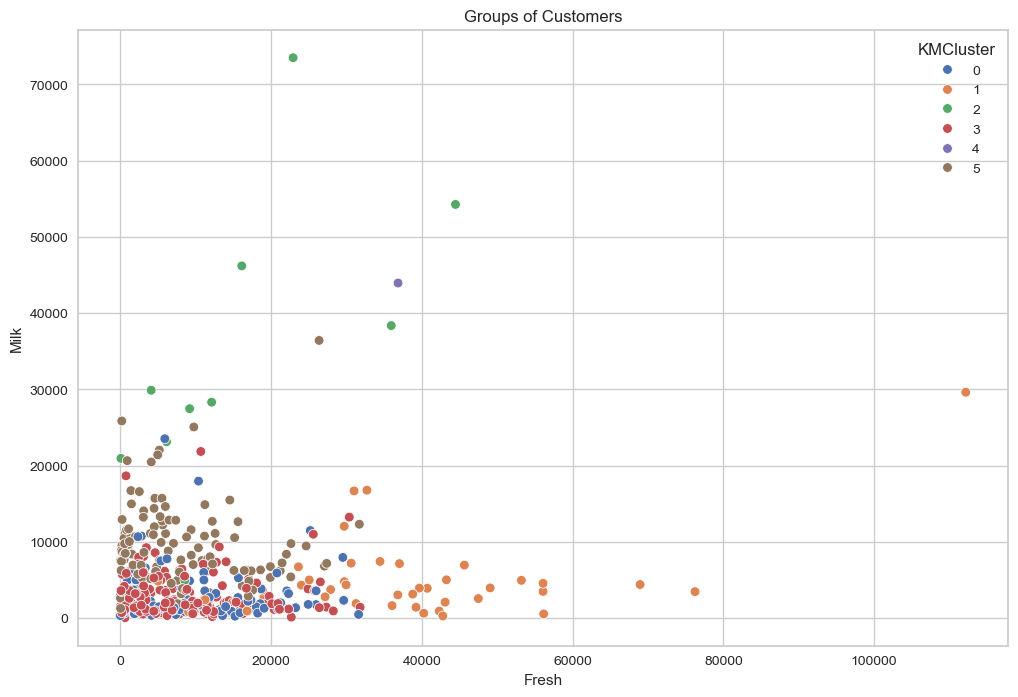

In [83]:
#visualize the results in a scatterplot of features grocery and milk
plt.figure(figsize=(12,8))

sns.scatterplot(x='Fresh', 
                y='Milk', 
                data=customers_data, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Groups of Customers')

plt.show()

In [85]:
#Kmeans with PCA
pca = PCA(n_components=2)
pc_scores = pca.fit_transform(X_scaled)
pc_scores = pd.DataFrame(pc_scores, columns=["PC1", "PC2"])
pca.explained_variance_ratio_.cumsum()

array([0.38750123, 0.61124711])

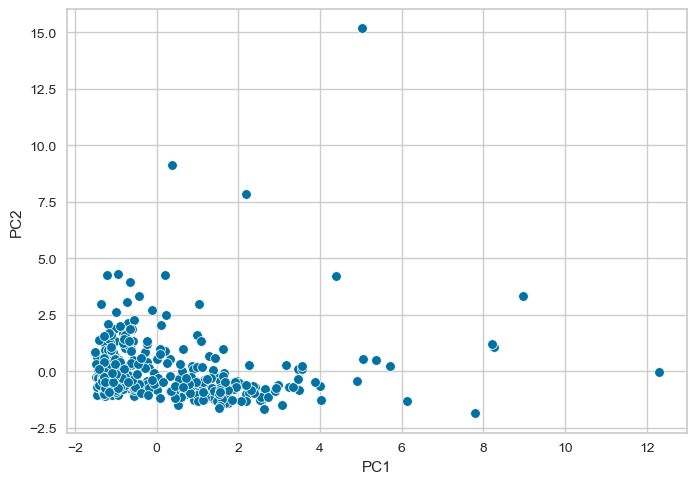

In [87]:
sns.scatterplot(x="PC1", y="PC2", data=pc_scores)
plt.show();

In [89]:
kmodel = KMeans(n_clusters=opt_k)
kmodel.fit(pc_scores)
cluster_assignment = kmodel.labels_
pc_scores["KMCluster"] = cluster_assignment
pc_scores.head()

,PC1,PC2,KMCluster
0,0.843939,-0.515351,4
1,1.062676,-0.484601,4
2,1.269141,0.682055,4
3,-1.056782,0.610821,0
4,0.634030,0.974199,4


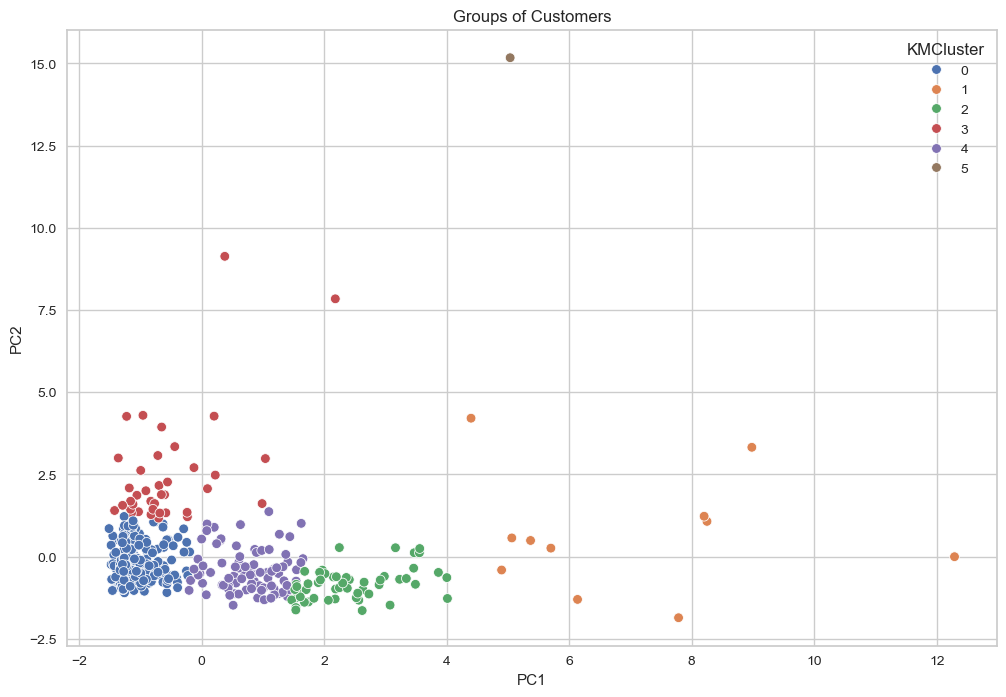

In [93]:
plt.figure(figsize=(12,8))

sns.scatterplot(x='PC1', 
                y='PC2', 
                data=pc_scores, 
                hue= "KMCluster",
                palette="deep"
               ).set_title('Groups of Customers')

plt.show()

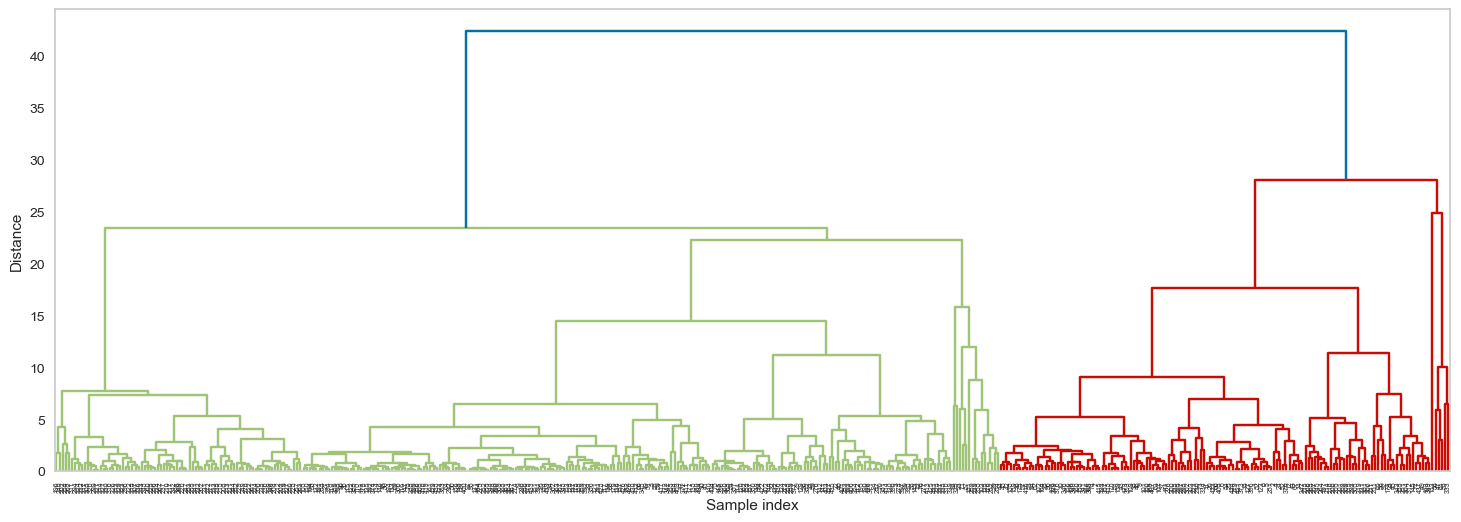

In [95]:
# Apply hierarchical clustering on the scaled data and draw a dendrogram 
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')
plt.grid(False)
plt.show()

In [109]:
#apply agglomerative hierarhical clustering
agglomerative = AgglomerativeClustering(n_clusters = 5, 
                                        linkage    = 'ward', # merges two clusters if the resulting has small variance
                                        metric     = 'euclidean')

agglomerative.fit(X_scaled)
cluster_assignment = agglomerative.labels_
cluster_assignment

array([2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 1, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 4, 2,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4,
       4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4,
       2, 4, 2, 4, 2, 4, 4, 4, 4, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 4, 2, 2, 4, 2,

In [111]:
customers_data["HCACluster"] = cluster_assignment
customers_data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KMCluster,HCACluster
0,2,3,12669,9656,7561,214,2674,1338,5,2
1,2,3,7057,9810,9568,1762,3293,1776,5,2
2,2,3,6353,8808,7684,2405,3516,7844,5,2
3,1,3,13265,1196,4221,6404,507,1788,3,0
4,2,3,22615,5410,7198,3915,1777,5185,5,2
5,2,3,9413,8259,5126,666,1795,1451,5,2
6,2,3,12126,3199,6975,480,3140,545,5,2
7,2,3,7579,4956,9426,1669,3321,2566,5,2
8,1,3,5963,3648,6192,425,1716,750,3,0
9,2,3,6006,11093,18881,1159,7425,2098,5,2


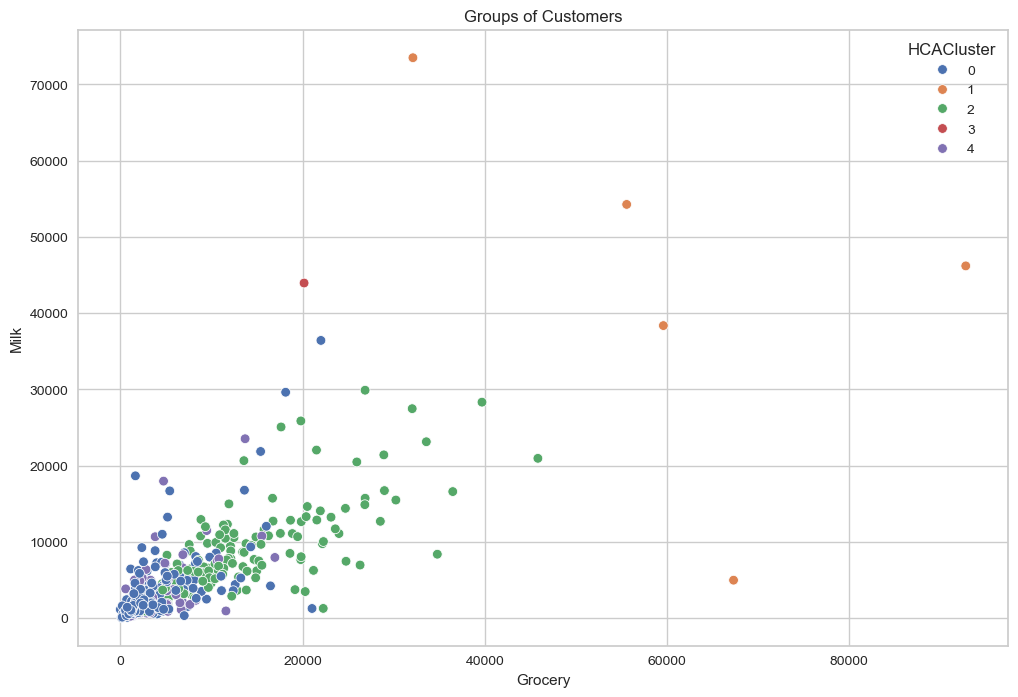

In [113]:
#visualize the results again(now for HCA cluster) in a scatterplot of features grocery and milk
plt.figure(figsize=(12,8))

sns.scatterplot(x='Grocery', 
                y='Milk', 
                data=customers_data, 
                hue= "HCACluster",
                palette="deep"
               ).set_title('Groups of Customers')

plt.show()